# LightnessPixelFilter 

Filter out pixels above a certain lightness level.

This is uniquely useful to Blake and other works where the background color will always be lighter than any applied pigment. This wouldn't necessarily be true of oil painting for instance.

In this notebook we create a PixelFilter subclass that filters based on lightness. Another approach would be to implement a different PixelFilter that will filter based on color distance.

## Import dependencies

In [1]:
# This is a trick to import from parent directories in Jupyter Notebooks
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import margo_loader
from utils.Formatting import convert_pixel
from background_deletion.PixelFilterBaseClass import PixelFilterBaseClass

import cv2
import numpy as np
from PIL import Image
from multiprocessing import Pool, cpu_count
from abc import ABC, abstractmethod

## Define the LightnessPixelFilter

In [2]:
class LightnessPixelFilter(PixelFilterBaseClass):
    
    def __init__(self, lmin, lmax):
        self.lmin = lmin
        self.lmax = lmax
        
    def filter_pixel(self, rgb):
        
        """
        Filter a pixel based on lightness. This converts the image HLS and then
        filters based on the L channel.
        """
        
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]

        h, l, s = convert_pixel(rgb, cv2.COLOR_RGB2HLS)
        if (l >= self.lmin) and (l <= self.lmax):
            return (r, g, b, 255)
        return (r, g, b, 0)
        


In [3]:
# :: ignore-cell ::

# Filter a single pixel. Since it's too light, it will be returned with an alpha channel of zero

lightness_filter = LightnessPixelFilter(0, 200)

lightness_filter.filter_pixel([250,250,250,250])

(250, 250, 250, 0)

## Example run with default settings

This shows what the image looks like when we remove the background with default lightness filter thresholds. It just takes out the paper color around the edge but leaves everything else in tact.

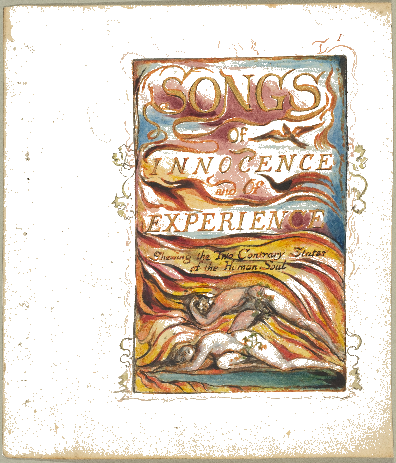

In [4]:
# :: ignore-cell ::
# Remove the background

from utils.ImageFiles import read_img
image = read_img("../images/sample.jpg", scale=0.125)
no_bg = lightness_filter.filter_image(image)
Image.fromarray(no_bg)

## Examples of overdoing it

In this example, we lower the threshold of allowable lightness, and far too much of the image is lost.

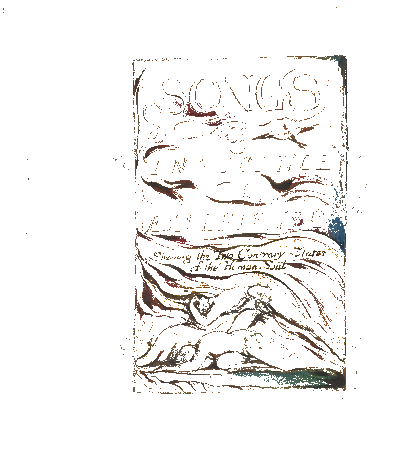

In [5]:
# :: ignore-cell ::
# Here's what it would look like if we mess with the filter to remove pixels even more liberally

lightness_filter_extreme = LightnessPixelFilter(0, 100)
no_bg = lightness_filter_extreme.filter_image(image)
Image.fromarray(no_bg)

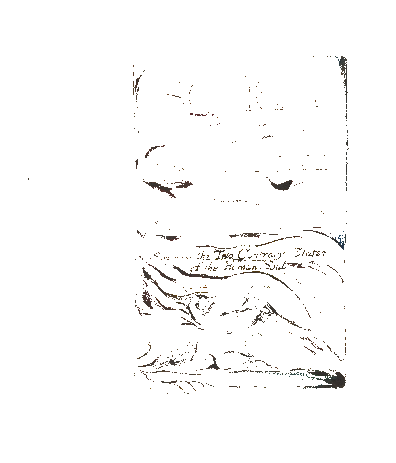

In [6]:
# :: ignore-cell ::
# Here's an attempt to isolate the very darkest pixel values
lightness_filter_extreme = LightnessPixelFilter(0, 70)
no_bg = lightness_filter_extreme.filter_image(image)
Image.fromarray(no_bg)

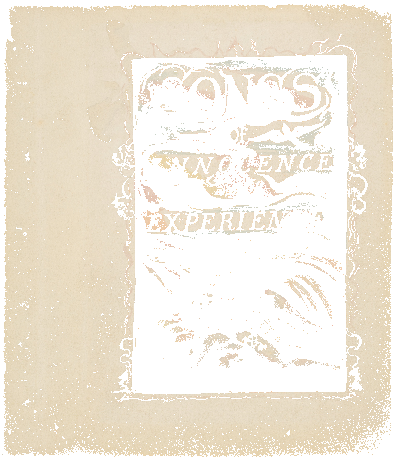

In [7]:
# :: ignore-cell ::
# Here's an attempt to isolate the very darkest pixel values
lightness_filter_extreme = LightnessPixelFilter(200, 300)
no_bg = lightness_filter_extreme.filter_image(image)
Image.fromarray(no_bg)